# Car Sale Value Prediction

---

**The price of a car depends on a lot of factors like the goodwill of the brand of the car,**
**features of the car, horsepower and the mileage it gives and many more. Car price**
**prediction is one of the major research areas in machine learning. So if you want to learn**
**how to train a car price prediction model then this project is for you.**

## 1. Import Libraries 

In [96]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Models and Utils
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [98]:
# For saving the created model
import pickle as pkl

In [99]:
# For cleaner output 
import warnings 
warnings.filterwarnings("ignore")

## 2. Loading Dataset

In [100]:
# file
path = "car data.csv"
# Car_Name column is being dropped (consists of more unique values & it's irrelevant unless any other usage)
df = pd.read_csv(path).drop("Car_Name" , axis = 1) 

df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 3. EDA

---

- Dataset Info
- Statistical Summary 
- Null value analaysis
- Distribution of Target
- Distribution of Features


In [101]:
# info
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 60.9 KB


In [102]:
# Statistical Summary (included only int64 and float64)
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [103]:
# Null value analysis
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [104]:
# categorical columns value counts
columns = ["Fuel_Type" , "Selling_type" , "Transmission"]
for col in columns:
    print("\n" , df[col].value_counts())


 Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

 Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


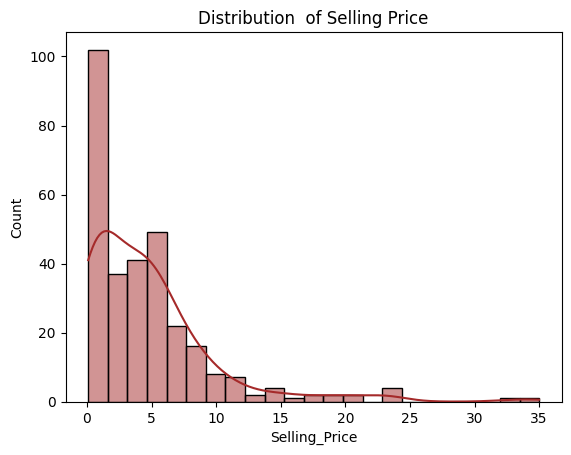

In [105]:
# Distribution of Target variable 
sns.histplot(x = df["Selling_Price"] , kde=True , color = "brown")
plt.title("Distribution  of Selling Price")
plt.show()

**Findings : Distribution is mostly around 1 - 7 lakhs**

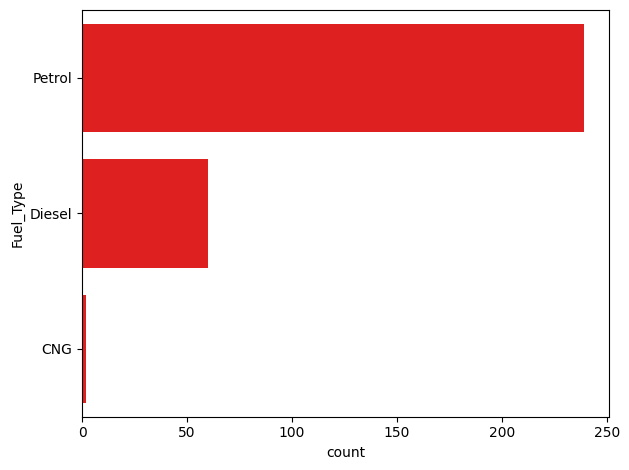

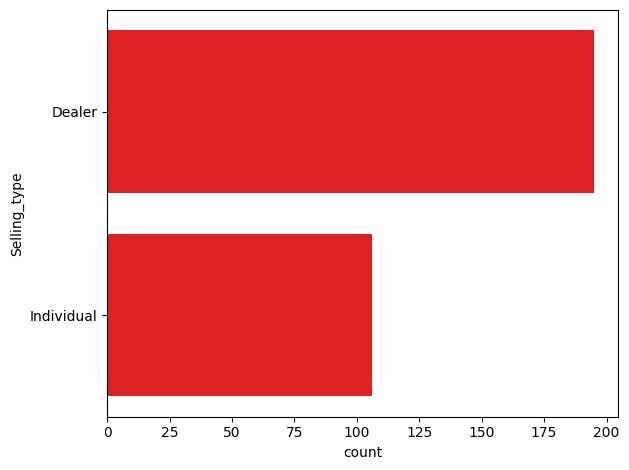

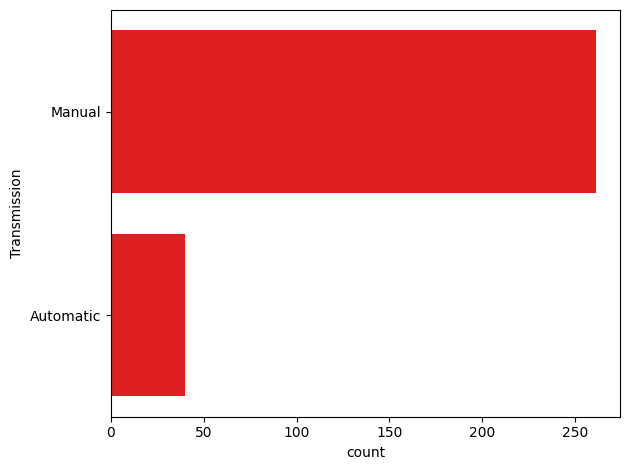

In [106]:
# categorical features
for col in columns :
    sns.countplot(df[col] , color="red")
    plt.tight_layout()
    plt.show()


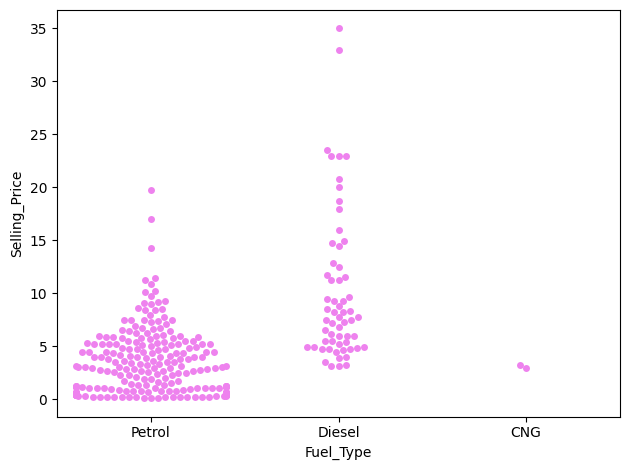

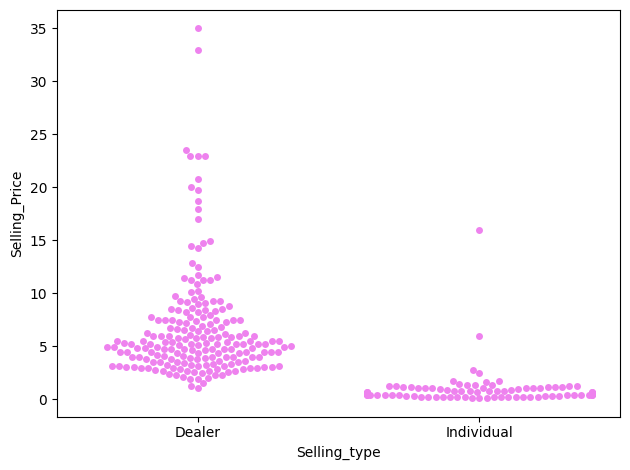

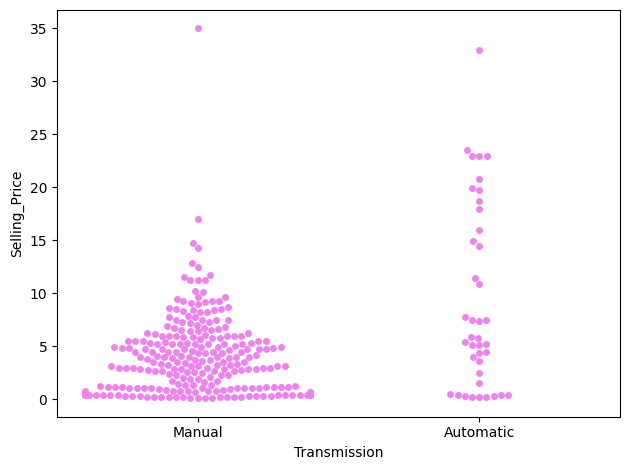

In [107]:
# Categorical vs Target 
for i , col in enumerate(columns , 1):
    sns.swarmplot( x = df[col] , y=df["Selling_Price"] , color="violet")
    plt.tight_layout()
    plt.show()

- **Findings - 1 : Fuel Type vs Selling price CNG is having a very few data points**
- **Findings - 2 : Sellings Type vs Selling price Individual (data points) is having lower than Dealer**
- **Findings - 3 : Transmission vs Selling price "Manual" leads than "Automatic"**

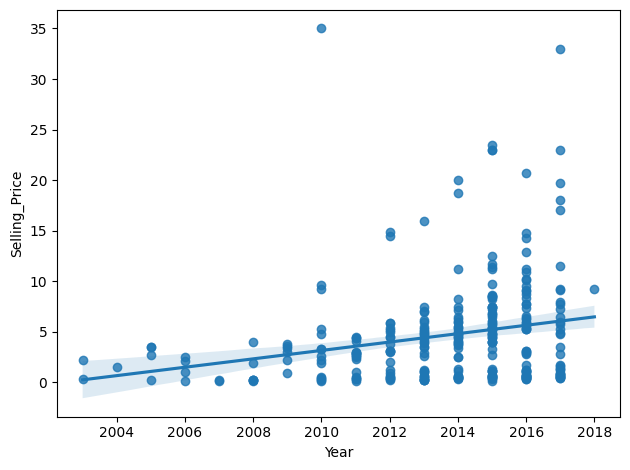

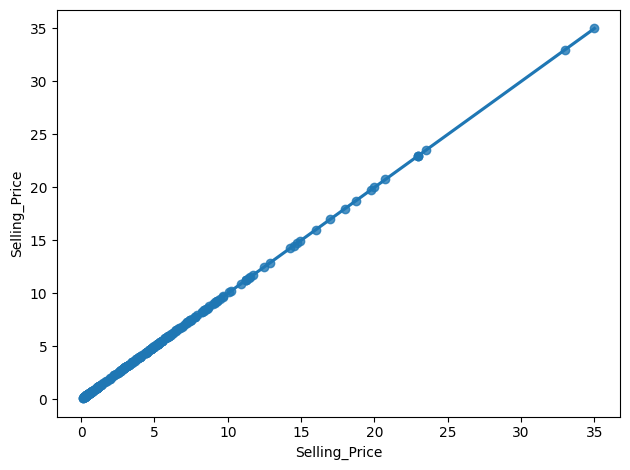

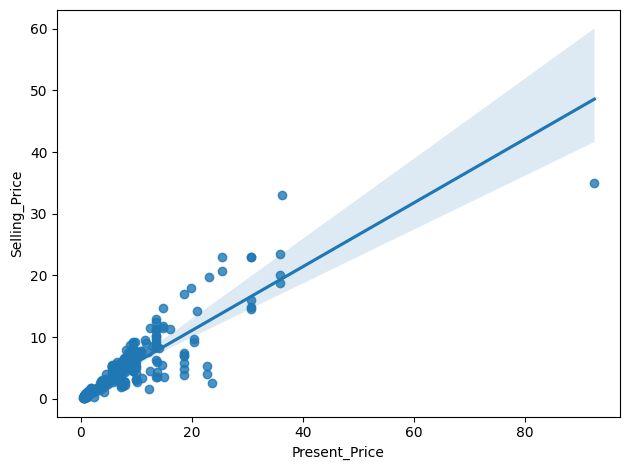

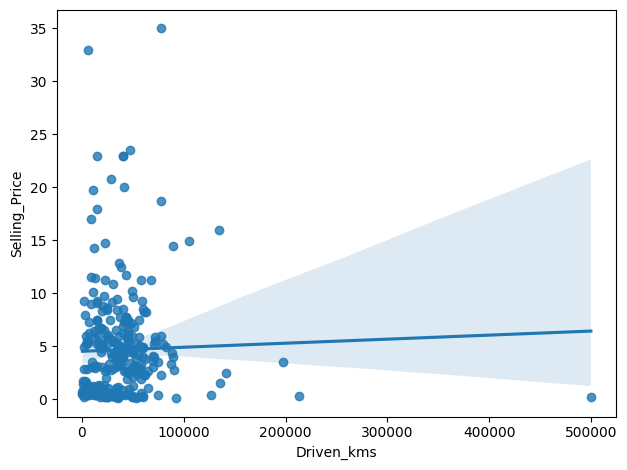

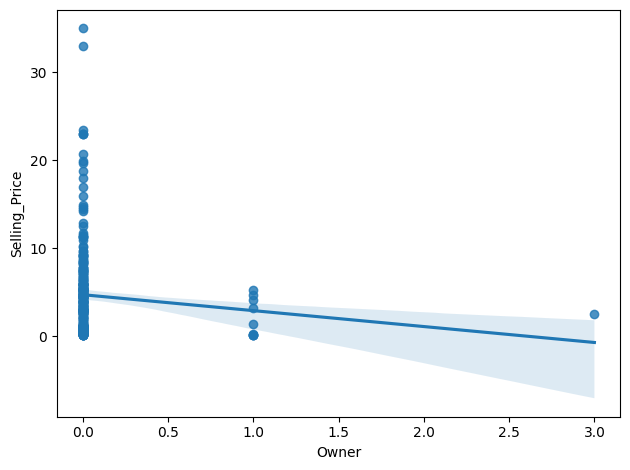

In [108]:
# Numerical vs Target 
numeric_cols = df.select_dtypes(["float64" , "int64"]).columns
for col in numeric_cols:
    sns.regplot(x = df[col] , y = df["Selling_Price"])
    plt.tight_layout()
    plt.show()

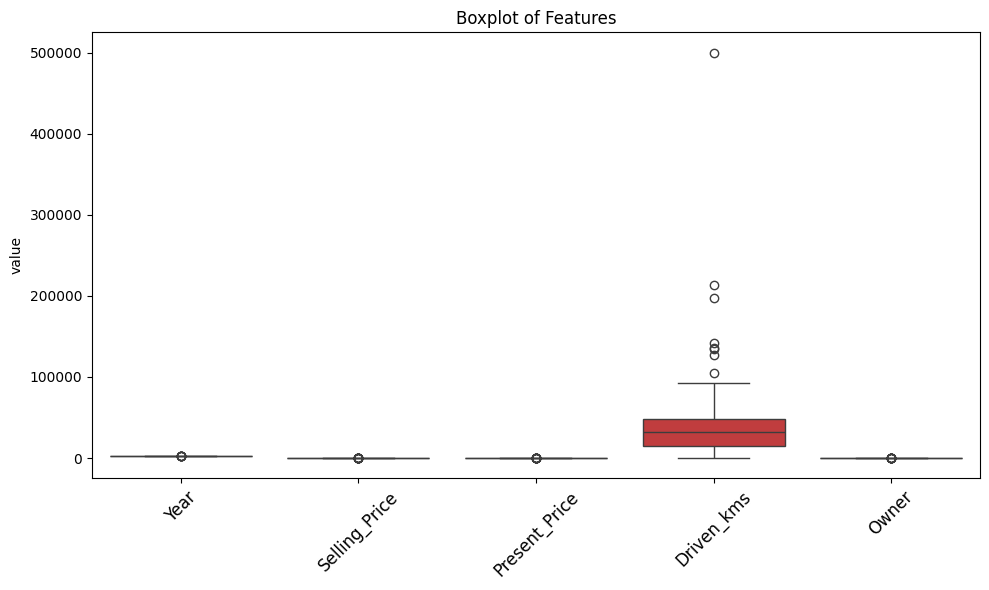

In [109]:
# Numerical/Discrete columns boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data = df)
plt.title("Boxplot of Features")
plt.xticks(rotation = 45 , fontsize = 12)
plt.ylabel("value")
plt.tight_layout()
plt.show()

**Findings : Driven_kms column is having a few outliers**

## 4. Preprocessing

In [110]:
# Label encoding 
le = LabelEncoder()
for col in ["Year" , "Fuel_Type" , "Selling_type" , "Transmission"]:
    df[col] = le.fit_transform(df[col])

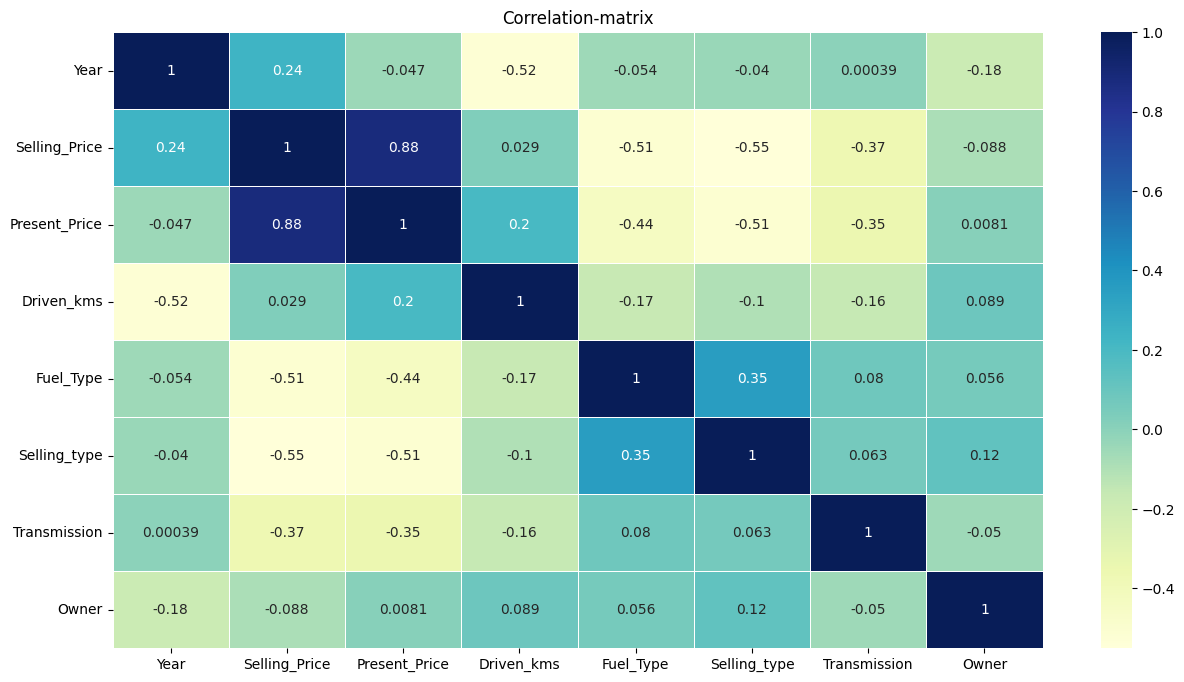

In [111]:
# correlation matrix & heatmap
correlation_matrix = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap( data = correlation_matrix , annot = True , cmap = "YlGnBu" , linewidth = 0.5)
plt.title("Correlation-matrix")
plt.show()

**Findings : Driven_kms and Owner is uncorrelated with Selling Price**

In [112]:
# Feature Elimination "Driven_Kms and Owner"
df.drop(columns=["Driven_kms" , "Owner"]  , inplace=True)

### Model Building 

#### Spliting of Features and Target variable

In [113]:
x = df.drop("Selling_Price" , axis = 1)
y = df["Selling_Price"]

X_train , X_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 42)

In [114]:
# shape

print("x shape" , x.shape)
print("x train shape - " , X_train.shape)
print("x test shape - " , X_test.shape)
print("y shape" , y.shape)
print("y train shape - " , y_train.shape)
print("y test shape - " , y_test.shape)

x shape (301, 5)
x train shape -  (240, 5)
x test shape -  (61, 5)
y shape (301,)
y train shape -  (240,)
y test shape -  (61,)


#### Model Pipeline

In [115]:
# Pipe
def ml_pipe(model, scale=True):
    steps = [] # steps 
    if scale:
        steps.append(("scaler", StandardScaler()))
    steps.append(("model", model))
    return Pipeline(steps, verbose=True)

#### Report Creator

In [116]:
def ReportEncapsulator(test , pred):
    # Test and Metrics 
    print("=============================")
    print("MAE : " , metrics.mean_absolute_error(test , pred))
    print("MSE : " , metrics.mean_squared_error(test, pred))
    print("RMSE : ",metrics.root_mean_squared_error(test , pred))
    print("R2 : ",metrics.r2_score(test , pred))
    print("=============================")

    # regression line
    plt.figure(figsize = (8 , 6))
    sns.scatterplot(x = test , y = pred ,alpha = 0.7)
    plt.plot([test.min(), test.max()], [test.min(), test.max()], color="red")  
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Predicted vs Actual Sales")
    plt.show()

    # residuals 
    residual = test - pred
    # plot
    plt.figure(figsize = (8 , 6))
    sns.scatterplot(x = pred , y = residual , color = 'blue')
    plt.axhline(y = 0 , color = "red" , linestyle = "--" )
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals Plot")
    plt.show()

#### Model : LinearRegression 

In [117]:
# Linear Regression
lr_model = ml_pipe(LinearRegression() , scale=True)
# Training
lr_model.fit(X_train , y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

MAE :  1.2120639356953233
MSE :  3.4508541699910054
RMSE :  1.857647482702519
R2 :  0.8501946340041244


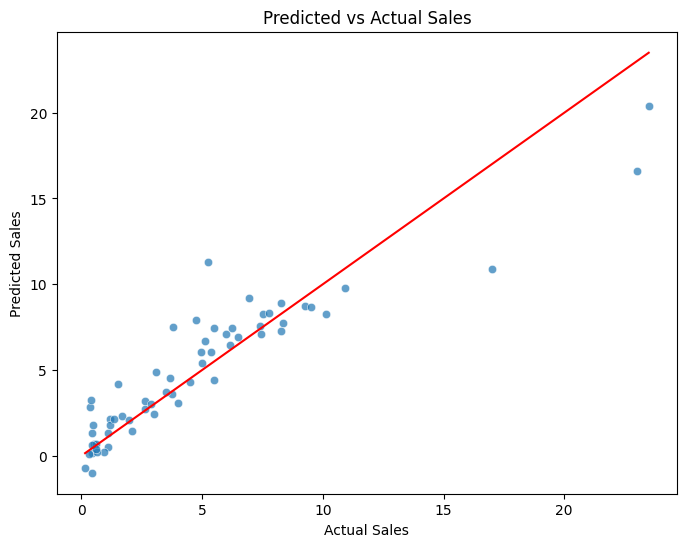

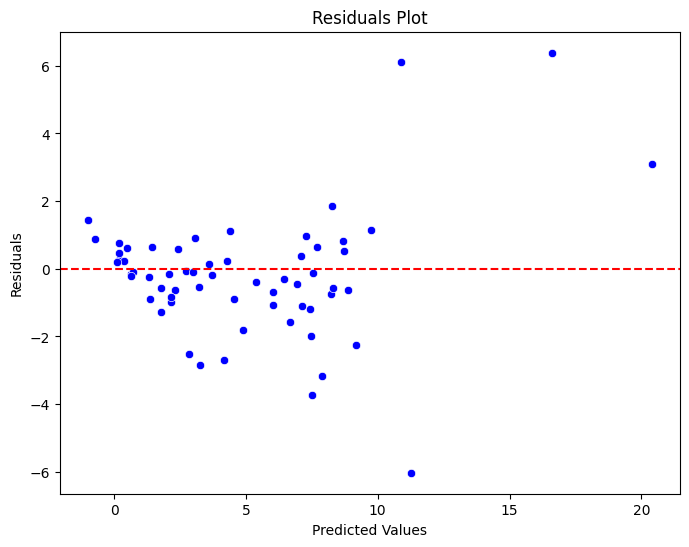

In [118]:
# predicion 
y_pred = lr_model.predict(X_test)

# Report Summary of Model
ReportEncapsulator(y_test , y_pred)

#### Random Forest Regressor 

In [121]:
# Random Forest Regressor 
rf_model = ml_pipe(RandomForestRegressor() , scale=False)
# Training
rf_model.fit(X_train , y_train)

[Pipeline] ............. (step 1 of 1) Processing model, total=   0.1s


Pipeline(steps=[('model', RandomForestRegressor())], verbose=True)

MAE :  0.5613236930783244
MSE :  0.7672508538010282
RMSE :  0.8759285666086181
R2 :  0.9666927985645332


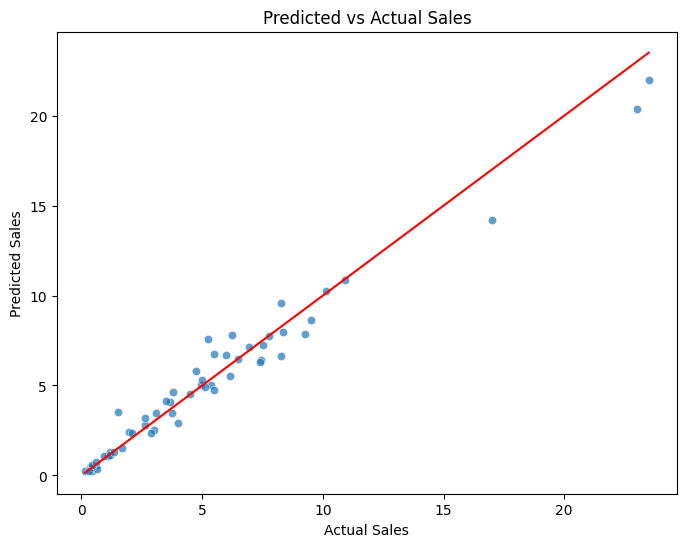

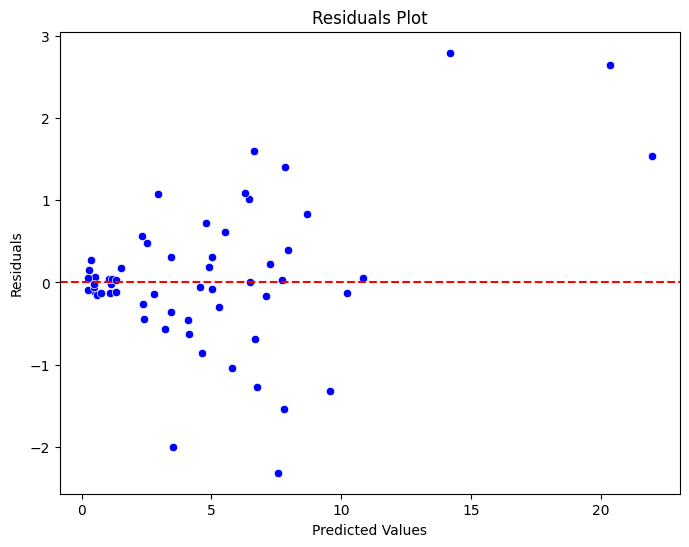

In [122]:
# predicion 
y_pred = rf_model.predict(X_test)

# Report Summary of Model
ReportEncapsulator(y_test , y_pred)

#### Manual Prediction 

In [193]:
# for manual data prediction 
def manual_prediction(model , input_data):
    input_data_as_np = np.asarray(input_data)
    input_data_reshaped = input_data_as_np.reshape(1,-2)
    prediction = model.predict(input_data_reshaped)[0]
    return round(prediction,2)

In [194]:
# manual data using  - Random Forest Regressor
input_data = (2014,5.59,27000,0,0)
result = manual_prediction(rf_model,input_data)
print('predicted price of car',result ,"lakhs")

predicted price of car 4.32 lakhs


In [196]:
# manual data - Random Forest Regressor
input_data = (  2020 , 9.5, 35000, 0, 1)
result = manual_prediction(rf_model , input_data)
print("predicted price of car" , result , "lakhs")

predicted price of car 8.9 lakhs


### Saving the model

In [ ]:
# Choose best model :  Random Forest Regressor

with open("car_sales_model.pkl", "wb") as file:
    pkl.dump(rf_model , file)


###  Conclusion: Why We Choose Random Forest Over Linear Regression

Model Performance Observation

- Linear Regression

    - Produced predictions that included negative car prices, which are not realistic in any real-world scenario.

    - This issue arises because Linear Regression is an unbounded model, meaning it can predict values outside the observed target range (both too high and too low).

    - It is highly sensitive to outliers, multicollinearity, and extrapolation.

- Random Forest Regressor

    - Delivered realistic and bounded predictions, always within the range of training data.

    - Works by averaging predictions from multiple decision trees, which prevents extreme outliers.

    - Handles non-linearity, feature interactions, and categorical/continuous variables much better than simple linear models.